In [2]:
import pandas as pd

df = pd.read_csv("/content/Exam_Score_Prediction.csv")
df.head()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


In [3]:
df.shape

(20000, 13)

In [5]:
df.describe

<bound method NDFrame.describe of        student_id  age  gender   course  study_hours  class_attendance  \
0               1   17    male  diploma         2.78              92.9   
1               2   23   other      bca         3.37              64.8   
2               3   22    male     b.sc         7.88              76.8   
3               4   20   other  diploma         0.67              48.4   
4               5   20  female  diploma         0.89              71.6   
...           ...  ...     ...      ...          ...               ...   
19995       19997   18   other      bba         6.50              71.3   
19996       19998   18    male    b.com         3.71              41.6   
19997       19999   19   other  diploma         7.88              68.2   
19998       20000   19    male      bba         4.60              76.3   
19999       20001   20    male     b.sc         7.50              47.9   

      internet_access  sleep_hours sleep_quality   study_method  \
0                 yes          7.4          poor       coaching   
1                 yes          4.6       average  online videos   
2                 yes          8.5          poor       coaching   
3                 yes          5.8       average  online videos   
4                 yes          9.8          poor       coaching   
...               ...          ...           ...            ...   
19995             yes          5.0          good     self-study   
19996              no          5.9       average       coaching   
19997             yes          4.6          poor    group study   
19998              no          6.1          good     self-study   
19999             yes          7.5          poor       coaching   

      facility_rating exam_difficulty  exam_score  
0                 low            hard        58.9  
1              medium        moderate        54.8  
2                high        moderate        90.3  
3                 low        moderate        29.7  
4                 low        moderate        43.7  
...               ...             ...         ...  
19995             low            easy        86.5  
19996          medium        moderate        60.9  
19997             low            easy        64.5  
19998          medium        moderate        79.0  
19999          medium        moderate        71.0  

[20000 rows x 13 columns]>

In [6]:
df.isnull().sum()

,0
student_id,0
age,0
gender,0
course,0
study_hours,0
class_attendance,0
internet_access,0
sleep_hours,0
sleep_quality,0
study_method,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        20000 non-null  int64  
 1   age               20000 non-null  int64  
 2   gender            20000 non-null  object 
 3   course            20000 non-null  object 
 4   study_hours       20000 non-null  float64
 5   class_attendance  20000 non-null  float64
 6   internet_access   20000 non-null  object 
 7   sleep_hours       20000 non-null  float64
 8   sleep_quality     20000 non-null  object 
 9   study_method      20000 non-null  object 
 10  facility_rating   20000 non-null  object 
 11  exam_difficulty   20000 non-null  object 
 12  exam_score        20000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 2.0+ MB


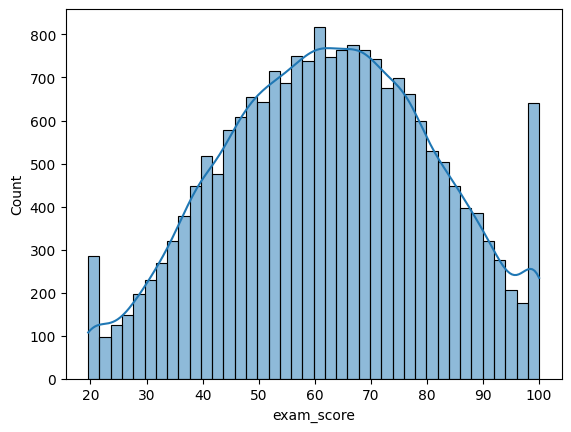

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["exam_score"], kde=True)
plt.show()

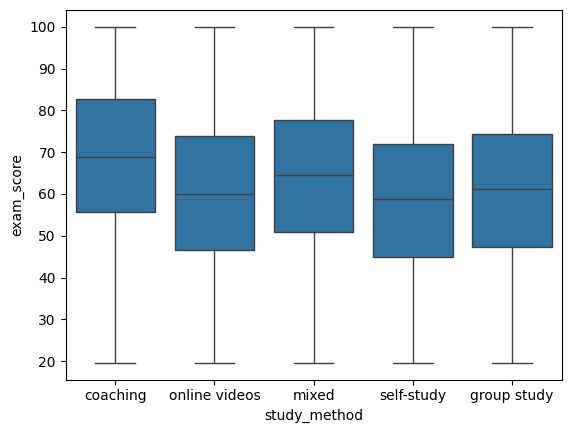

In [48]:
sns.boxplot(x="study_method", y="exam_score", data=df)
plt.show()

In [9]:
categorical_cols = ['gender', 'course', 'internet_access', 'sleep_quality', 'study_method', 'facility_rating', 'exam_difficulty']

for col in categorical_cols:
    print(f"\n--- Column: {col} ---")
    print("Unique values:", df[col].unique())
    print("Value counts:\n", df[col].value_counts())



--- Column: gender ---
Unique values: ['male' 'other' 'female']
Value counts:
 gender
other     6726
male      6695
female    6579
Name: count, dtype: int64

--- Column: course ---
Unique values: ['diploma' 'bca' 'b.sc' 'b.tech' 'bba' 'ba' 'b.com']
Value counts:
 course
bca        2902
ba         2896
b.sc       2878
b.com      2864
bba        2836
diploma    2826
b.tech     2798
Name: count, dtype: int64

--- Column: internet_access ---
Unique values: ['yes' 'no']
Value counts:
 internet_access
yes    16988
no      3012
Name: count, dtype: int64

--- Column: sleep_quality ---
Unique values: ['poor' 'average' 'good']
Value counts:
 sleep_quality
average    6694
poor       6687
good       6619
Name: count, dtype: int64

--- Column: study_method ---
Unique values: ['coaching' 'online videos' 'mixed' 'self-study' 'group study']
Value counts:
 study_method
self-study       4079
online videos    4069
coaching         4036
group study      3922
mixed            3894
Name: count, dtype: int6

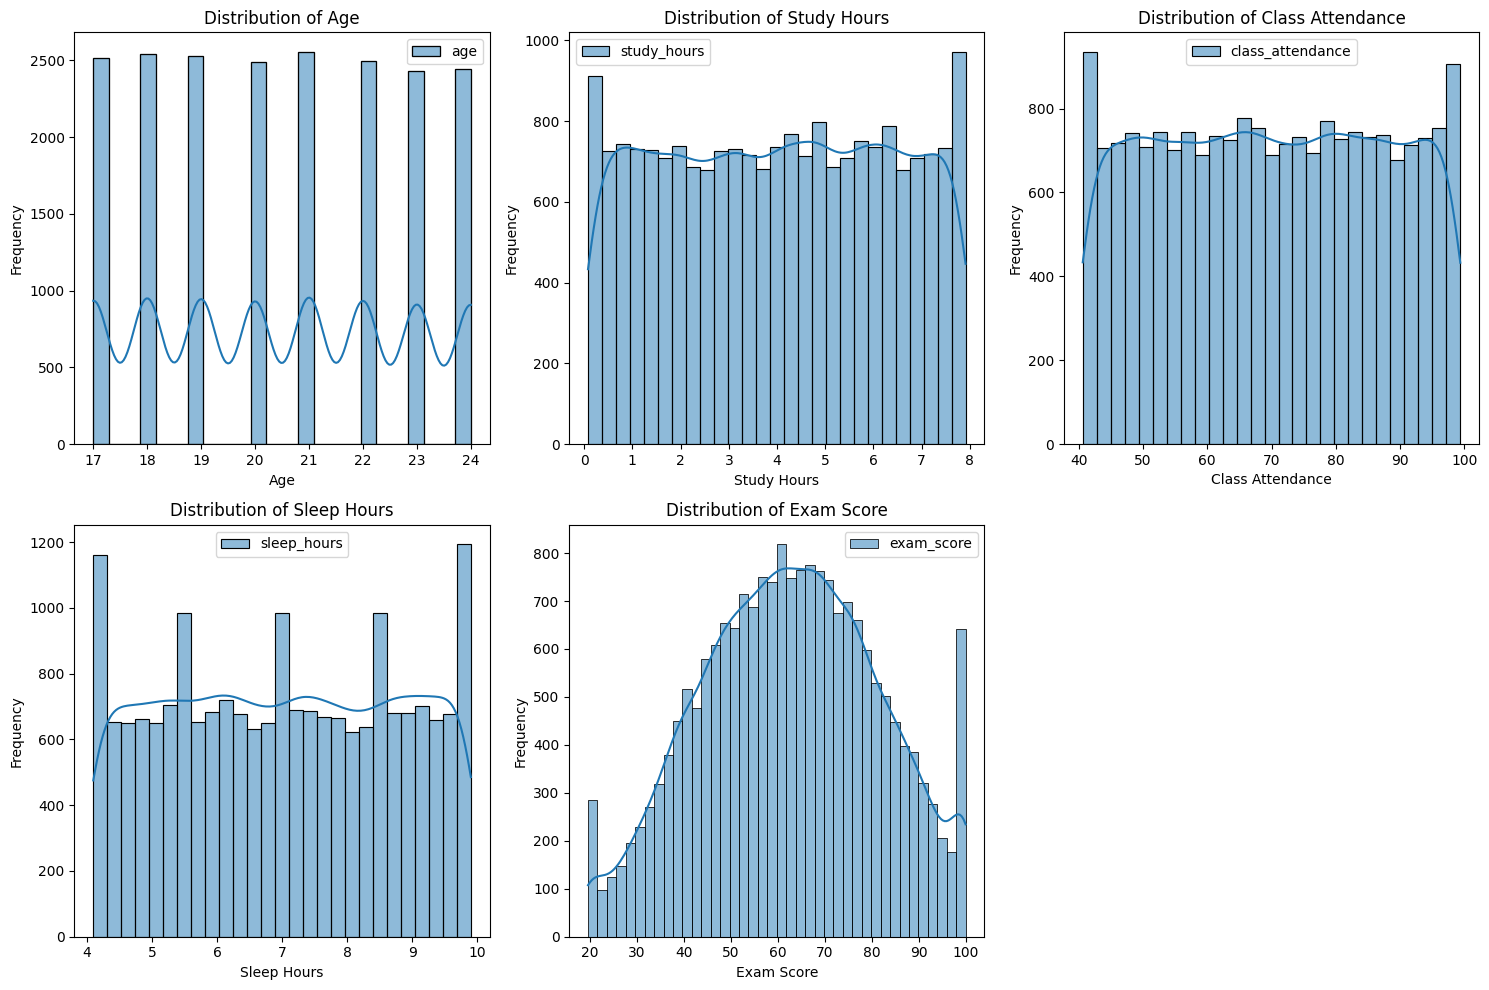

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['age', 'study_hours', 'class_attendance', 'sleep_hours', 'exam_score']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1) # Arrange plots in 2 rows, 3 columns
    sns.histplot(df[col], kde=True, label=col)
    plt.title(f'Distribution of {col.replace("_", " ").title()}')
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

In [14]:
df.head()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


In [18]:
new_df = df.drop(columns=['gender', 'course', 'internet_access', 'sleep_quality', 'study_method', 'facility_rating'])
new_df.head()


,student_id,age,study_hours,class_attendance,sleep_hours,exam_difficulty,exam_score
0,1,17,2.78,92.9,7.4,hard,58.9
1,2,23,3.37,64.8,4.6,moderate,54.8
2,3,22,7.88,76.8,8.5,moderate,90.3
3,4,20,0.67,48.4,5.8,moderate,29.7
4,5,20,0.89,71.6,9.8,moderate,43.7


In [26]:
difficulty_map = {
    'easy': 1,
    'moderate': 2,
    'hard': 3
}

df['exam_difficulty_encoded'] = df['exam_difficulty'].map(difficulty_map)

In [29]:
new_df['exam_difficulty_encoded'] = df['exam_difficulty_encoded']

new_df.head()

,student_id,age,study_hours,class_attendance,sleep_hours,exam_score,exam_difficulty_encoded
0,1,17,2.78,92.9,7.4,58.9,3
1,2,23,3.37,64.8,4.6,54.8,2
2,3,22,7.88,76.8,8.5,90.3,2
3,4,20,0.67,48.4,5.8,29.7,2
4,5,20,0.89,71.6,9.8,43.7,2


In [33]:
cols = new_df.columns.tolist()
cols.insert(5, cols.pop(cols.index('exam_difficulty_encoded')))
new_df = new_df[cols]
new_df.head()

,student_id,age,study_hours,class_attendance,sleep_hours,exam_difficulty_encoded,exam_score
0,1,17,2.78,92.9,7.4,3,58.9
1,2,23,3.37,64.8,4.6,2,54.8
2,3,22,7.88,76.8,8.5,2,90.3
3,4,20,0.67,48.4,5.8,2,29.7
4,5,20,0.89,71.6,9.8,2,43.7


Multi_linear Regression model

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target (y)
X = new_df.drop(columns=['student_id', 'exam_score'])
y = new_df['exam_score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

print("\nModel Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")
print(f"Intercept: {model.intercept_:.2f}")

Mean Squared Error: 132.54
R-squared: 0.63

Model Coefficients:
age: 0.02
study_hours: 5.87
class_attendance: 0.34
sleep_hours: 1.42
exam_difficulty_encoded: 0.11
Intercept: 4.33


In [40]:
import joblib

joblib.dump(model, 'Exam_Multilinear_model.pkl')

['Exam_Multilinear_model.pkl']

Descision trees

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the Decision Tree model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"\nDecision Tree Regressor Model Performance:")
print(f"Mean Squared Error (Decision Tree): {mse_dt:.2f}")
print(f"R-squared (Decision Tree): {r2_dt:.2f}")


Decision Tree Regressor Model Performance:
Mean Squared Error (Decision Tree): 289.18
R-squared (Decision Tree): 0.19


| Model                          | MSE        | R²       | RMSE     |
| ------------------------------ | ---------- | -------- | -------- |
| **Multiple Linear Regression** | **132.54** | **0.63** | **11.5** |
| **Decision Tree Regressor**    | **289.18** | **0.19** | **17.0** |


In [41]:
joblib.dump(model, 'Exam_Decisiontrees_model.pkl')

['Exam_Decisiontrees_model.pkl']

Random forest regression

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"\nRandom Forest Regressor Model Performance:")
print(f"Mean Squared Error (Random Forest): {mse_rf:.2f}")
print(f"R-squared (Random Forest): {r2_rf:.2f}")


Random Forest Regressor Model Performance:
Mean Squared Error (Random Forest): 147.99
R-squared (Random Forest): 0.59


In [42]:
joblib.dump(model, 'Exam_RandomForest_model.pkl')

['Exam_RandomForest_model.pkl']